In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium as folium
# from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim
import plotly.express as px
from pyecharts.charts import Map,Geo

In [5]:
# load data
PATH = "D:/VScode_directory/14_days_project/Visualization/Earth Surface Temperature/dataset/"
global_temperature = pd.read_csv(PATH+'GlobalTemperatures.csv')

In [6]:
# 曲線圖
# x軸為時間  y軸為 LandAverageTemperature
plt.plot(global_temperature.loc[0:10,"dt"] , global_temperature.loc[0:10,"LandAverageTemperature"] , 
'o-' , color='r', label="Land Temperature")
plt.show()

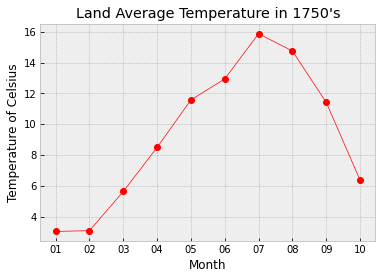

In [7]:
# 由於x軸的dt時間軸太多於   因為皆是同一年  因此改為皆為月份
month = pd.DataFrame(global_temperature.loc[0:10,"dt"])
temp = []
for i in month["dt"]:
    temp.append(i[5:7])
month['1750s_month'] = temp
del temp

# replot
plt.style.use('bmh')
plt.plot(month.loc[:,'1750s_month'] , global_temperature.loc[0:10,"LandAverageTemperature"] , 
'o-' , color='r', linewidth=0.7)
# Add Title x_lab y_lab
plt.title("Land Average Temperature in 1750's")
plt.xlabel("Month")
plt.ylabel("Temperature of Celsius")
plt.show()

In [8]:
# Add LandAndOceanAverageTemperature to Line Chart
# 先找出第幾年開始才有 LandAndOceanAverageTemperature數值及年數
global_temperature.loc[ global_temperature.loc[:,"LandAndOceanAverageTemperature"] >0 ,"dt"]
#由結果可知道  1850-01-01開始(第1200 row)  LandAndOceanAverageTemperature才開始有數值 所以LandAverageTemperature也要從1850年再開始

1200    1850-01-01
1201    1850-02-01
1202    1850-03-01
1203    1850-04-01
1204    1850-05-01
           ...    
3187    2015-08-01
3188    2015-09-01
3189    2015-10-01
3190    2015-11-01
3191    2015-12-01
Name: dt, Length: 1992, dtype: object

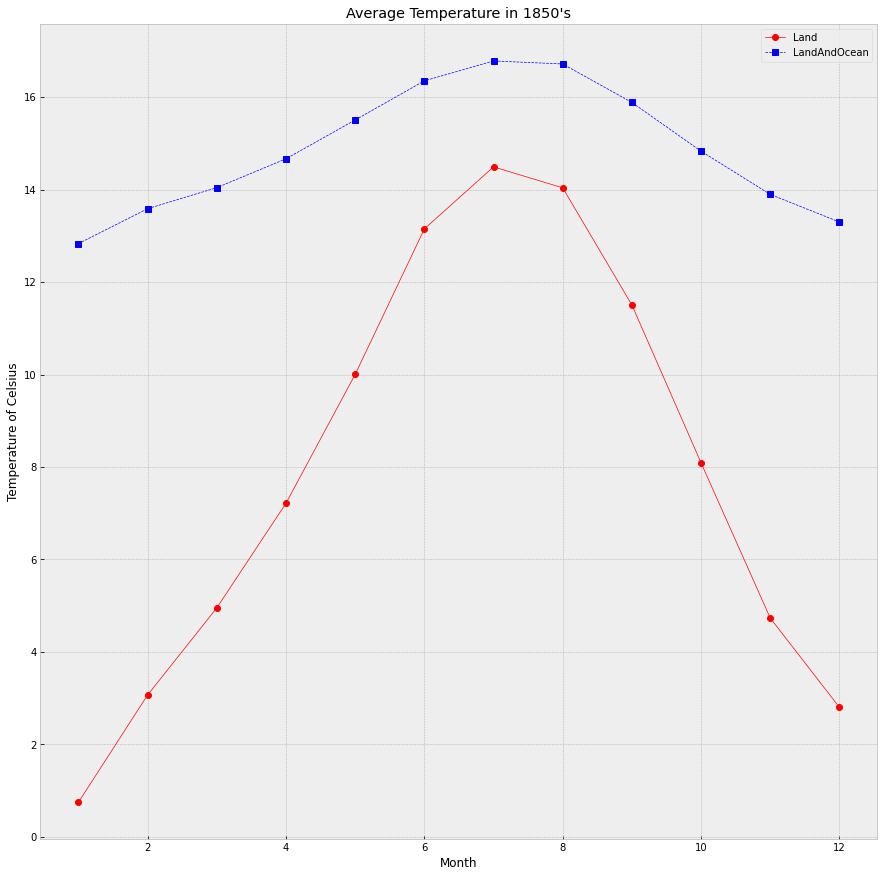

In [9]:
#此方式有2種折線圖去表示  一個是 1750年開始  而海陸溫度是0  另一個是都從1850年開始  我則畫第二種方式
temperature_1850s = global_temperature.loc[1200:1211,['LandAverageTemperature','LandAndOceanAverageTemperature']]
temperature_1850s['month'] = range(1,13)
# plot
plt.style.use('bmh')
plt.figure(figsize=(15,15))
plt.plot( temperature_1850s.loc[:,'month'] , temperature_1850s.loc[:,'LandAverageTemperature'] , 
'o-' , color='r', linewidth=0.7 , label="Land" , linestyle='solid')
plt.plot( temperature_1850s.loc[:,'month'] , temperature_1850s.loc[:,'LandAndOceanAverageTemperature'] , 
's-' , color='b', linewidth=0.7 , label="LandAndOcean" , linestyle='dashed')
# Add Title x_lab y_lab
plt.title("Average Temperature in 1850's")
plt.xlabel("Month")
plt.ylabel("Temperature of Celsius")
plt.legend(loc='upper right') #儘管有設定圖例 就是上面的label  但是如果沒有plt.legend  一樣跑不出來
plt.show()

C:\Program Files (x86)\Python\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


TypeError: 'Series' objects are mutable, thus they cannot be hashed